# 군집화(Clustering)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Iris 데이터로 지도학습(결정트리) 비지도학습(군집화) 비교

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
irisDF = pd.DataFrame(iris.data, columns = ['sl','sw','pl','pw'])
irisDF.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


K-Means 모델 생성/학습

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 2021)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=2021)

In [20]:
pd.Series(kmeans.labels_).value_counts()

0    62
1    50
2    38
dtype: int64

In [15]:
irisDF['target'] = iris.target # 실제 target
irisDF['cluster'] = kmeans.labels_ # Clustering 결과
irisDF.head()
# 0과 1로 다 나왔다고 다 틀린것이 아니라 Clustering은 자기 마음대로 labeling을 하기 때문에 일어난 일. 알아볼 수 있기만 하면 된다.

,sl,sw,pl,pw,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [22]:
clustering_result = irisDF.groupby(['target','cluster']).count()
clustering_result

sl  sw  pl  pw
target cluster                
0      1        50  50  50  50
1      0        48  48  48  48
       2         2   2   2   2
2      0        14  14  14  14
       2        36  36  36  36

군집화 결과를 차원 축소하여 시각화

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

pca = PCA(n_components = 2)
iris_pca = pca.fit_transform(iris_std)

In [25]:
irisDF['pca_x'] = iris_pca[:, 0]
irisDF['pca_y'] = iris_pca[:, 1]
irisDF.head()

,sl,sw,pl,pw,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,1,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,1,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,1,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,-2.389842,0.646835


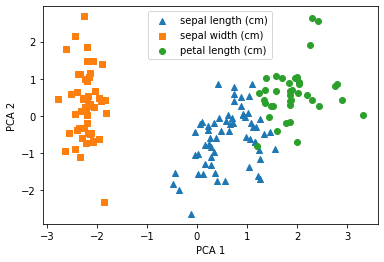

In [42]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미
markers = ['^',"s",'o']

# setosa, versicolor, virginica cluster 값 순서대로 0, 1, 2
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF.cluster == i]['pca_x']
    y_axis_data = irisDF[irisDF.cluster == i]['pca_y']

    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.feature_names[i])

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

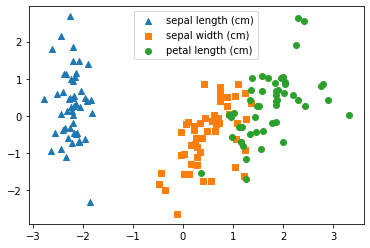

In [34]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미
markers = ['^',"s",'o']

# setosa, versicolor, virginica target 값 순서대로 0, 1, 2
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF.target == i]['pca_x']
    y_axis_data = irisDF[irisDF.target == i]['pca_y']

    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.feature_names[i])
plt.legend()
plt.show()

그림 두개 한 번에 그리기

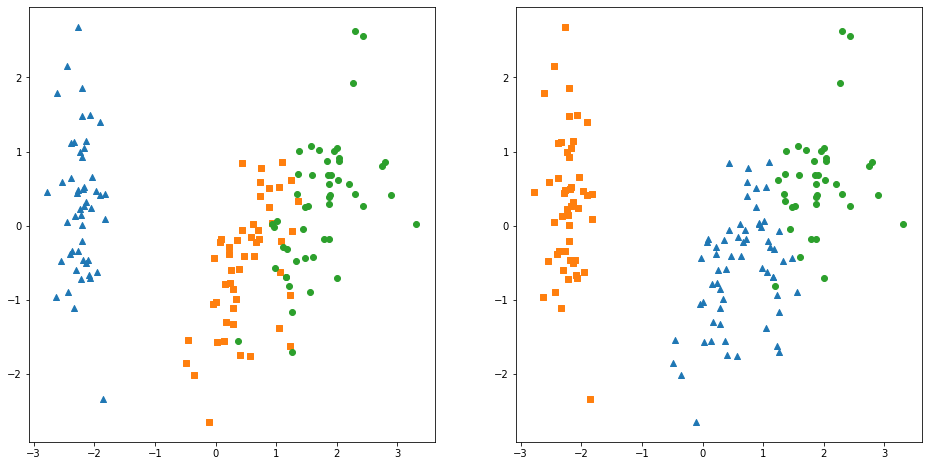

In [59]:
fig, ax = plt.subplots( figsize=(16,8), ncols = 2, nrows = 1 )

markers = ['^',"s",'o']

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF.target == i]['pca_x']
    y_axis_data = irisDF[irisDF.target == i]['pca_y']
    ax1.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.feature_names   [i])

    x_axis_data = irisDF[irisDF.cluster == i]['pca_x']
    y_axis_data = irisDF[irisDF.cluster == i]['pca_y']
    ax2.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.feature_names   [i])

plt.show()

Clustering 알고리즘 테스트를 위한 데이터 생성
- makeRegression()과 같은 역할

In [62]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3,
                  cluster_std = 4, random_state = 2021)
print(X.shape, y.shape)

(200, 2) (200,)


In [63]:
# target의 분포
unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

[0 1 2] [67 67 66]


In [64]:
clusterDF = pd.DataFrame(X, columns = ['feature1','feature2'])
clusterDF['target'] = y
clusterDF.head()

,feature1,feature2,target
0,-1.420755,0.524051,1
1,9.606759,-16.785233,2
2,9.463470,-12.342820,2
3,5.992541,-9.566412,2
4,-5.988626,4.843629,1


- 그룹핑 개수를 늘려감에 따라 모양이 어떻게 바뀔까?

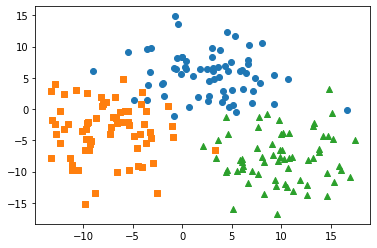

In [70]:
# 3개밖에 안 쓰지만 예비로 준비함
markers = ['o', 's', '^', 'P','D','H','x']


target_list = np.unique(y)ㅉ
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x = target_cluster['feature1'],y = target_cluster['feature2'],       marker = markers[target])
plt.show()

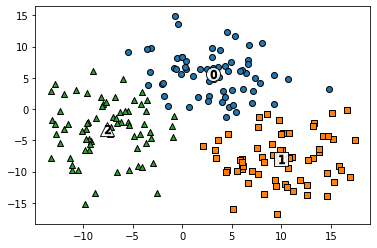

In [68]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, random_state=2021)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['feature1'], y=label_cluster['feature2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [69]:
clusterDF.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       0               62
        2                4
        1                1
1       2               65
        0                1
        1                1
2       1               64
        0                2
Name: kmeans_label, dtype: int64